# Excersice 4

Feature selection:

1. You need to load the UCI Arrhythmia dataset
https://archive.ics.uci.edu/ml/datasets/arrhythmia
* the problem is a multi-class classification

2. For comparing the result you need to use kNN (k=3), and compare based on the accuracy with the original dataset (with the all features).

2. Run three different types of feature selection methods (Univariate Statistics, model based, and Iterative Feature Selection).
* The original data set has 279 features.
* You need to run the methods for number_of_features= 20, 50, 100, 150, 200
* All the results should show in the same figure (At the end we have just one figure)

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

import math

pd.set_option('max_columns', None)
pd.set_option('max_row', None)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

### 1. Load the UCI Arrhythmia dataset

In [30]:
arr = pd.read_csv('arrhythmia.data', sep=',')
arr.columns = ["age",	"sex",	"height",	"weight",	"qrs_duration",	"p-r_interval",	"q-t_interval",	"t_interval",	"p_interval",	"qrs",	"T",	"P",	"QRST",	"J",	"heart_rate",	"q_wave",	"r_wave",	"s_wave",	"R'_wave",	"S'_wave",	"AA",	"AB",	"AC",	"AD",	"AE",	"AF",	"AG",	"AH",	"AI",	"AJ",	"AK",	"AL",	"AM",	"AN",	"AO",	"AP",	"AQ",	"AR",	"AS",	"AT",	"AU",	"AV",	"AW",	"AX",	"AY",	"AZ",	"BA",	"BB",	"BC",	"BD",	"BE",	"BF",	"BG",	"BH",	"BI",	"BJ",	"BK",	"BL",	"BM",	"BN",	"BO",	"BP",	"BQ",	"BR",	"BS",	"BT",	"BU",	"BV",	"BW",	"BX",	"BY",	"BZ",	"CA",	"CB",	"CC",	"CD",	"CE",	"CF",	"CG",	"CH",	"CI",	"CJ",	"CK",	"CL",	"CM",	"CN",	"CO",	"CP",	"CQ",	"CR",	"CS",	"CT",	"CU",	"CV",	"CW",	"CX",	"CY",	"CZ",	"DA",	"DB",	"DC",	"DD",	"DE",	"DF",	"DG",	"DH",	"DI",	"DJ",	"DK",	"DL",	"DM",	"DN",	"DO",	"DP",	"DQ",	"DR",	"DS",	"DT",	"DU",	"DV",	"DW",	"DX",	"DY",	"DZ",	"EA",	"EB",	"EC",	"ED",	"EE",	"EF",	"EG",	"EH",	"EI",	"EJ",	"EK",	"EL",	"EM",	"EN",	"EO",	"EP",	"EQ",	"ER",	"ES",	"ET",	"EU",	"EV",	"EW",	"EX",	"EY",	"EZ",	"FA",	"FB",	"FC",	"FD",	"FE",	"FF",	"FG",	"FH",	"FI",	"FJ",	"FK",	"FL",	"FM",	"FN",	"FO",	"FP",	"FQ",	"FR",	"FS",	"FT",	"FU",	"FV",	"FW",	"FX",	"FY",	"FZ",	"IA",	"IB",	"IC",	"ID",	"IE",	"IF",	"IG",	"IH",	"II",	"IJ",	"IK",	"IL",	"IM",	"IN",	"IO",	"IP",	"IQ",	"IR",	"IS",	"IT",	"IU",	"IV",	"IW",	"IX",	"IY",	"IZ",	"JA",	"JB",	"JC",	"JD",	"JE",	"JF",	"JG",	"JH",	"JI",	"JJ",	"JK",	"JL",	"JM",	"JN",	"JO",	"JP",	"JQ",	"JR",	"JS",	"JT",	"JU",	"JV",	"JW",	"JX",	"JY",	"JZ",	"KA",	"KB",	"KC",	"KD",	"KE",	"KF",	"KG",	"KH",	"KI",	"KJ",	"KK",	"KL",	"KM",	"KN",	"KO",	"KP",	"KQ",	"KR",	"KS",	"KT",	"KU",	"KV",	"KW",	"KX",	"KY",	"KZ",	"LA",	"LB",	"LC",	"LD",	"LE",	"LF",	"LG",	"LH",	"LI",	"LJ",	"LK",	"LL",	"LM",	"LN",	"LO",	"LP",	"LQ",	"LR",	"LS",	"LT",	"LU",	"LV",	"LW",	"LX",	"LY",	"diagnosis"]

In [31]:
arr.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,T,P,QRST,J,heart_rate,q_wave,r_wave,s_wave,R'_wave,S'_wave,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN,AO,AP,AQ,AR,AS,AT,AU,AV,AW,AX,AY,AZ,BA,BB,BC,BD,BE,BF,BG,BH,BI,BJ,BK,BL,BM,BN,BO,BP,BQ,BR,BS,BT,BU,BV,BW,BX,BY,BZ,CA,CB,CC,CD,CE,CF,CG,CH,CI,CJ,CK,CL,CM,CN,CO,CP,CQ,CR,CS,CT,CU,CV,CW,CX,CY,CZ,DA,DB,DC,DD,DE,DF,DG,DH,DI,DJ,DK,DL,DM,DN,DO,DP,DQ,DR,DS,DT,DU,DV,DW,DX,DY,DZ,EA,EB,EC,ED,EE,EF,EG,EH,EI,EJ,EK,EL,EM,EN,EO,EP,EQ,ER,ES,ET,EU,EV,EW,EX,EY,EZ,FA,FB,FC,FD,FE,FF,FG,FH,FI,FJ,FK,FL,FM,FN,FO,FP,FQ,FR,FS,FT,FU,FV,FW,FX,FY,FZ,IA,IB,IC,ID,IE,IF,IG,IH,II,IJ,IK,IL,IM,IN,IO,IP,IQ,IR,IS,IT,IU,IV,IW,IX,IY,IZ,JA,JB,JC,JD,JE,JF,JG,JH,JI,JJ,JK,JL,JM,JN,JO,JP,JQ,JR,JS,JT,JU,JV,JW,JX,JY,JZ,KA,KB,KC,KD,KE,KF,KG,KH,KI,KJ,KK,KL,KM,KN,KO,KP,KQ,KR,KS,KT,KU,KV,KW,KX,KY,KZ,LA,LB,LC,LD,LE,LF,LG,LH,LI,LJ,LK,LL,LM,LN,LO,LP,LQ,LR,LS,LT,LU,LV,LW,LX,LY,diagnosis
0,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,0,0,0,40,0,0,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0,0,44,20,0,0,24,0,0,0,0,0,0,0,60,0,0,0,20,0,0,0,0,0,0,0,24,52,0,0,16,0,0,0,0,0,0,0,32,52,0,0,20,0,0,0,0,0,0,0,44,48,0,0,32,0,0,0,0,0,0,0,48,44,0,0,32,0,0,0,0,0,0,0,48,40,0,0,28,0,0,0,0,0,0,0,48,0,0,0,28,0,0,0,0,0,0,-0.6,0.0,7.2,0.0,0.0,0.0,0.4,1.5,17.2,26.5,0.0,0.0,5.5,0.0,0.0,0.0,0.1,1.7,17.6,29.5,0.3,-1.6,0.9,0.0,0.0,0.0,-0.3,0.4,-1.5,1.3,0.1,-6.4,0.0,0.0,0.0,0.0,-0.3,-1.6,-15.3,-25.5,-0.3,0.0,4.2,-0.9,0.0,0.0,0.4,0.7,8.3,12.3,0.2,0.0,2.2,0.0,0.0,0.0,-0.2,0.8,6.6,11.7,0.4,0.0,1.0,-8.8,0.0,0.0,0.5,-0.6,-21.6,-26.8,0.4,0.0,2.6,-7.9,0.0,0.0,0.8,2.0,-16.4,1.2,0.0,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
1,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,116,0,0,0,52,0,0,0,0,0,0,52,64,0,0,0,88,0,0,0,0,0,0,0,36,92,0,0,24,0,0,0,0,0,0,0,128,0,0,0,24,0,1,0,0,0,0,0,24,36,76,0,100,0,0,0,0,0,0,0,40,28,60,0,96,0,0,0,0,0,0,0,48,20,56,24,32,0,0,0,0,0,0,0,44,88,0,0,28,0,0,0,0,0,0,0,44,76,0,0,28,0,0,0,0,0,0,0,44,72,0,0,24,0,0,0,0,0,0,1.0,0.0,4.5,-2.8,0.0,0.0,0.3,2.5,-2.2,19.8,0.8,-0.4,6.4,-1.3,0.0,0.0,0.7,2.7,14.2,37.9,-0.2,-0.6,4.4,0.0,0.0,0.0,0.5,0.2,24.7,26.2,-1.0,-5.3,1.8,0.0,0.0,0.0,-0.5,-2.5,-8.0,-28.5,0.5,0.0,1.7,-2.7,0.0,0.0,-0.2,1.0,-9.4,-1.2,0.4,0.0,4.9,0.0,0.0,0.0,0.6,1.4,31.3,42.7,-0.8,0.0,0.7,-3.8,6.5,0.0,0.3,-3.3,18.7,-13.6,-0.9,0.0,2.2,-4.1,7.4,0.0,0.5,-2.4,20.9,-2.6,0.0,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
2,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,52,48,0,0,56,0,0,0,0,0,0,64,32,0,0,0,72,0,0,0,0,0,0,0,60,12,0,0,44,0,0,0,0,0,0,0,60,44,0,0,32,0,0,0,0,0,0,56,0,0,0,0,0,0,0,0,0,0,0,0,40,44,0,0,20,0,0,0,0,0,0,0,52,40,0,0,32,0,0,0,0,0,0,0,56,48,0,0,36,0,0,0,0,0,0,0,60,48,0,0,36,0,0,0,0,0,0,0,64,40,0,0,40,0,0,0,0,0,0,0.9,0.0,7.8,-0.7,0.0,0.0,1.1,1.9,27.3,45.1,0.1,0.0,9.1,-2.6,0.0,0.0,0.4,1.5,24.5,36.8,-0.4,-0.4,1.6,-2.2,0.0,0.0,-1.0,-0.9,-1.5,-9.2,-0.4,-8.2,1.8,0.0,0.0,0.0,-0.7,-1.7,-23.4,-35.6,0.9,0.0,3.2,-0.4,0.0,0.0,0.7,1.2,9.4,18.0,-0.1,0.0,5.1,-2.5,0.0,0.0,0.3,0.6,9.8,12.6,1.6,-6.5,0.0,0.0,0.0,0.0,-0.4,-0.4,-18.2,-22.4,2.1,0.0,1.2,-6.9,0.0,0.0,-0.5,2.9,-12.7,18.0,0.7,0.0,9.0,-7.9,0.0,0.0,0.1,4.1,7.6,51.0,0.4,0.0,15.0,-5.5,0.0,0.0,0.1,3.3,28.8,63.1,0.1,0.0,15.2,-3.7,0.0,0.0,0.6,3.0,36.8,68.0,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
3,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,?,0,48,40,0,0,28,0,0,0,0,0,0,0,40,24,0,0,24,0,0,0,0,0,0,52,36,0,0,0,60,0,0,0,0,0,0,48,28,0,0,0,56,0,0,0,0,0,0,0,48,36,0,0,28,0,0,0,0,0,0,44,0,0,0,0,0,0,0,0,0,0,0,88,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,48,52,0,0,32,0,0,0,0,0,0,0,52,44,0,0,28,0,0,0,0,0,0,0,52,4

In [32]:
# Removing columns 28-39, since they are the same as 16-27
# arr = arr.drop(labels=["AH",	"AI",	"AJ",	"AK",	"AL",	"AM",	"AN",	"AO",	"AP",	"AQ",	"AR",	"AS"], axis=1)

In [33]:
arr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Columns: 280 entries, age to diagnosis
dtypes: float64(120), int64(155), object(5)
memory usage: 986.6+ KB


In [34]:
arr.describe().T #Normal humans cannot be 780 in height

,count,mean,std,min,25%,50%,75%,max
age,451.0,46.407982,16.429846,0.0,36.00,47.0,58.00,83.0
sex,451.0,0.552106,0.497830,0.0,0.00,1.0,1.00,1.0
height,451.0,166.135255,37.194646,105.0,160.00,164.0,170.00,780.0
weight,451.0,68.144124,16.599841,6.0,59.00,68.0,78.50,176.0
qrs_duration,451.0,88.915743,15.381143,55.0,80.00,86.0,94.00,188.0
p-r_interval,451.0,155.068736,44.856534,0.0,142.00,157.0,174.50,524.0
q-t_interval,451.0,367.199557,33.422017,232.0,350.00,367.0,384.00,509.0
t_interval,451.0,169.940133,35.672130,108.0,148.00,162.0,179.00,381.0
p_interval,451.0,89.935698,25.813912,0.0,79.00,91.0,102.00,205.0
qrs,451.0,33.787140,45.421423,-172.0,4.00,40.0,66.00,169.0


In [35]:
arr['height'].value_counts().sort_index() #Let's see how many abnormal heights we have (from below we have 608 and 780)

# and they are one each, so we will replace them by the mean of the height column

105     1
110     1
119     1
120     2
124     1
127     1
130     2
132     1
133     1
138     1
140     1
146     1
148     1
149     1
150     9
152     1
153     5
154     4
155    23
156    19
157    10
158     9
159     6
160    81
161     5
162    15
163    16
164     9
165    46
166     9
167     8
168    15
169     7
170    40
171     9
172    14
173     7
174     4
175    21
176    10
177     4
178     9
179     1
180     4
181     1
182     2
184     1
185     3
186     3
188     1
190     2
608     1
780     1
Name: height, dtype: int64

In [36]:
# dynamically replace them with means

arr.loc[arr["height"] == 608, "height"] = math.floor(arr["height"].mean())
arr.loc[arr["height"] == 608, "height"] = math.floor(arr["height"].mean())

In [37]:
arr['height'].value_counts().sort_index()

105     1
110     1
119     1
120     2
124     1
127     1
130     2
132     1
133     1
138     1
140     1
146     1
148     1
149     1
150     9
152     1
153     5
154     4
155    23
156    19
157    10
158     9
159     6
160    81
161     5
162    15
163    16
164     9
165    46
166    10
167     8
168    15
169     7
170    40
171     9
172    14
173     7
174     4
175    21
176    10
177     4
178     9
179     1
180     4
181     1
182     2
184     1
185     3
186     3
188     1
190     2
780     1
Name: height, dtype: int64

In [38]:
# look for null values

arr.isna().sum().sum()

0

In [39]:
arr.columns[arr.eq('?').any()]

Index(['T', 'P', 'QRST', 'J', 'heart_rate'], dtype='object')

In [40]:
# Columns above have the '?', which are missing values
# lets see how many for each column

arr['T'].eq('?').sum()  # T has 8 as againt 451 samples,  we will substitude mean here

8

In [41]:
arr['P'].eq('?').sum() # P is 22, we will substitude mean here

22

In [42]:
arr['QRST'].eq('?').sum() # QRST has 1,  we will substitude mean here

1

In [43]:
arr['J'].eq('?').sum() # J has 375 as against 451 samples, we will drop this column

375

In [44]:
arr['heart_rate'].eq('?').sum() # And this has just 1, we will substitude the mean of the distribution

1

In [45]:
#arr.drop(labels='J', axis=1, inplace=True)

In [46]:
arr.loc[arr["T"] == '?', "T"] = np.nan
arr.loc[arr["P"] == '?', "P"] = np.nan
arr.loc[arr["QRST"] == '?', "QRST"] = np.nan
arr.loc[arr["heart_rate"] == '?', "heart_rate"] = np.nan
arr.loc[arr["J"] == '?', "J"] = np.nan

In [47]:
arr.isna().sum().sum()

407

In [48]:
arr['T'].fillna((arr['T'].median()), inplace=True)
arr['P'].fillna(arr['P'].median(), inplace=True)
arr['QRST'].fillna(arr['QRST'].median(), inplace=True)
arr['heart_rate'].fillna(arr['heart_rate'].median(), inplace=True)
arr['J'].fillna((arr['J'].median()), inplace=True)

In [49]:
arr.isna().sum().sum()

0

In [50]:
# Data Preprocessing

def preprocessing_inputs(df, column):
    df = df.copy()
    
    # Split df into X and y
    y = df[column]
    X = df.drop(column, axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train = pd.DataFrame(scaler.transform(X_train), 
                           index=X_train.index, 
                           columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), 
                          index=X_test.index, 
                          columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [51]:
# dataset scaling and splitting

X_train, X_test, y_train, y_test = preprocessing_inputs(arr, "diagnosis")


In [52]:
X = arr.drop(labels="diagnosis", axis=1)
y = arr['diagnosis']

In [53]:
# modelling


knn=KNeighborsClassifier(n_neighbors=3)
#-------------------------------------------------------------------
models=[]
models.append(('KNeighborsClassifier',knn))
#--------------------------------------------------------------------

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score
from sklearn.model_selection import cross_val_score
#--------------------------------------------------------------------
Model=[]
score=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(X_train,y_train)
    print(model)
    pre=model.predict(X_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score  -',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,X,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
        
    print('classification report\n',classification_report(y_test,pre))
    print('\n')


***************** KNeighborsClassifier *******************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')


Accuracy_score  - 0.5384615384615384


cross_val_score  - 0.6058191384800923


classification report
               precision    recall  f1-score   support

           1       0.54      1.00      0.70        44
           2       0.33      0.08      0.13        12
           3       1.00      0.50      0.67         4
           4       0.50      0.33      0.40         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       1.00      0.09      0.17        11
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         1
          16       

The above is for the original data, with the normal arrhythmia having the best precision

### Univariate Statistics Feature Selection

In [54]:
# we are still going to include the original feature size along with our analysis


import math

feature_numbers = [20, 50, 100, 150, 200, 279]
fnum = []
score=[]
models=[]
knn=KNeighborsClassifier(n_neighbors=3)
models.append(('KNeighborsClassifier',knn))

from sklearn.feature_selection import SelectPercentile
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score

for number in feature_numbers:
    ##
    #print(str(number) + ' features selected')
    fnum.append(number)
    number_percentage = math.floor((number*100)/279)
    select = SelectPercentile(percentile=number_percentage)
    select.fit(X_train, y_train)
    # transform training set
    X_train_selected = select.transform(X_train)
    # transform test data
    X_test_selected = select.transform(X_test)
    
    # modelling
    #--------------------------------------------------------------------
    
    Model=[]
    

    for name,model in models:
        #print('*****************',name,'*******************')
        #print('\n')
        Model.append(name)
        model.fit(X_train_selected,y_train)
        #print(model)
        pre=model.predict(X_test_selected)
        #print('\n')
        AS=accuracy_score(y_test,pre)
        #print('Accuracy_score  -',AS)
        score.append(round(AS*100, 1))


result=pd.DataFrame({'FeatureNum':fnum,'Accuracy_UnivStat':score})
#result

### Model-Based Feature Selection

In [55]:
# we are still going to include the original feature size along with our analysis

feature_numbers2 = [20, 50, 100, 150, 200, 279]
fnum2 = []
score2=[]
models2=[]
knn=KNeighborsClassifier(n_neighbors=3)
models2.append(('KNeighborsClassifier',knn))

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


for number in feature_numbers2:
    ##
    #print(str(number) + ' features selected')
    fnum2.append(number)
    #number_percentage = math.floor((number*100)/279)
    select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),max_features=number,threshold=-np.inf)
    select.fit(X_train, y_train)
    # transform training set
    X_train_selected = select.transform(X_train)
    # transform test data
    X_test_selected = select.transform(X_test)
    
    # modelling
    #--------------------------------------------------------------------
    
    Model2=[]

    for name,model2 in models2:
        #print('*****************',name,'*******************')
        #print('\n')
        Model2.append(name)
        model2.fit(X_train_selected,y_train)
        #print(model)
        pre=model2.predict(X_test_selected)
        #print('\n')
        AS=accuracy_score(y_test,pre)
        #print('Accuracy_score  -',AS)
        score2.append(round(AS*100, 1))


result2=pd.DataFrame({'FeatureNum':fnum2,'Accuracy_ModelBased':score2})
#result2

### Iterative Feature Selection

In [56]:
# we are still going to include the original feature size along with our analysis

feature_numbers3 = [20, 50, 100, 150, 200, 279]
fnum3 = []
score3=[]
models3=[]
knn=KNeighborsClassifier(n_neighbors=3)
models3.append(('KNeighborsClassifier',knn))

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


for number in feature_numbers3:
    ##
    #print(str(number) + ' features selected')
    fnum3.append(number)
    #number_percentage = math.floor((number*100)/279)
    select = RFE(RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),n_features_to_select=number)
    select.fit(X_train, y_train)
    # transform training set
    X_train_selected = select.transform(X_train)
    # transform test data
    X_test_selected = select.transform(X_test)
    
    # modelling
    #--------------------------------------------------------------------
    
    Model3=[]
    

    for name,model3 in models3:
        #print('*****************',name,'*******************')
        #print('\n')
        Model3.append(name)
        model3.fit(X_train_selected,y_train)
        #print(model)
        pre=model3.predict(X_test_selected)
        #print('\n')
        AS=accuracy_score(y_test,pre)
        #print('Accuracy_score  -',AS)
        score3.append(round(AS*100, 1))
        

result3=pd.DataFrame({'FeatureNum':fnum3,'Accuracy_Iterative':score3})
#result3

In [57]:
merged_df = pd.merge(result, result2, on="FeatureNum")
df = pd.merge(merged_df, result3, on="FeatureNum")
print(df)

   FeatureNum  Accuracy_UnivStat  Accuracy_ModelBased  Accuracy_Iterative
0          20               64.8                 61.5                67.0
1          50               63.7                 63.7                59.3
2         100               60.4                 60.4                59.3
3         150               56.0                 52.7                56.0
4         200               52.7                 52.7                52.7
5         279               53.8                 53.8                53.8


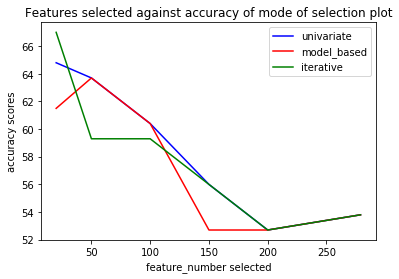

In [63]:
# Display results

ax = plt.gca()

ax.plot(fnum, score, "-b", label="univariate")
ax.plot(fnum2, score2, "-r", label="model_based")
ax.plot(fnum3, score3, "-g", label="iterative")
#ax.set_xscale()
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("feature_number selected")
plt.ylabel("accuracy scores")
plt.title("Features selected against accuracy of mode of selection plot")
plt.axis("tight")
plt.legend(loc="upper right")
plt.show()

### OBSERVATIONS

1. The univariate and model based aligns at some lower feature numbers,
univariate and iterative align also in some higher feature numbers.
2. Interestingly model based and iterative selections do not align but only intersects 3 times
3. All three converges at about 200 feature number 
4. Finally, its noteworthy to say that all three gives higher accuracies at lower feature number selections